In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Loading Datasets
reviews = pd.read_csv('airbnb_reviews_textblob.csv')
listing = pd.read_csv('airbnb_listing_imagereco.csv')

<h3>DATA CLEANING</h3>
During my analyzis I noticed that some rows in listing dataFrame were NOT in the reviews dataFrame. Thus all those rows must be removed prior to any further analysis to avoid unclean results. For this on the next code I'm merging both dataFrames and dropping rows with not in common. 

In [3]:
common = reviews.merge(listing)
reviews = reviews[reviews.id.isin(common.id)]
listing = listing[listing.id.isin(common.id)]

<h3>Understanding the data</h3>
<ol>
<li> Types of data
<li> Removing Null values if exist.
<li> How many neighboorhoods.
<li> What space types there are.
<li> Bground and Fground colors. How many.
<li> Most common color combinations.
<li> Avg price by neighboorhood.
</ol>

In [4]:
# Checking type of every column in the dataset
reviews.dtypes

id                    int64
author               object
rating                int64
comments             object
Polarity            float64
Sentiment            object
Keywords_reviews     object
dtype: object

In [5]:
listing.dtypes

id                         int64
city                      object
neighborhood              object
name                      object
lat                      float64
lng                      float64
person_capacity            int64
space_type                object
picture_url               object
price_rate                 int64
image_description         object
image_dominantfgColor     object
image_dominantbgColor     object
dtype: object

In [6]:
# Looking for null values
listing.isnull().sum()

id                       0
city                     0
neighborhood             0
name                     0
lat                      0
lng                      0
person_capacity          0
space_type               0
picture_url              0
price_rate               0
image_description        0
image_dominantfgColor    0
image_dominantbgColor    0
dtype: int64

In [7]:
# 3 and 4: Neighborhoods and Space Type
print(f"Neighborhoods: {len(listing.neighborhood.unique())}")
print(f"Space type: {len(listing.space_type.unique())}")
# Size for both dataFrames
print(f"Reviews: {len(reviews.index)}")
print(f"Listing: {len(listing.index)}")

Neighborhoods: 43
Space type: 12
Reviews: 1348
Listing: 271


**Neighborhoods and Space type**
Using Describe is great way to get some quick statistics. For example here I've noticed that 116 out of 271 of the listings are located in Downtown Toronto, which also has the most expensive place of all at 139\$ per night. Average price is 67\$ with a standard deviation of 20.9.<br>

In [8]:
# Neighborhoods
listing.groupby(by='neighborhood')['price_rate']\
.describe()\
.sort_values(by='count', ascending=False)\
.head(5)

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
Downtown Toronto,116.0,67.129310,20.956074,19.0,53.00,67.0,75.75,139.0
Garden District,21.0,49.761905,16.260088,11.0,41.00,51.0,60.00,75.0
Niagara,17.0,67.235294,10.991641,45.0,60.00,72.0,75.00,85.0
Palmerston/Little Italy,12.0,32.750000,8.955699,24.0,27.50,29.5,35.75,56.0
Harbourfront,12.0,73.000000,23.436568,44.0,57.75,71.5,78.00,130.0


**Now I will plot these top 5 neighborhood to better showcase density and distribution of prices. **

{'bodies': [<matplotlib.collections.PolyCollection at 0x11c46bb0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x11c46b70>,
 'cmins': <matplotlib.collections.LineCollection at 0x11c467d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x11c46670>}

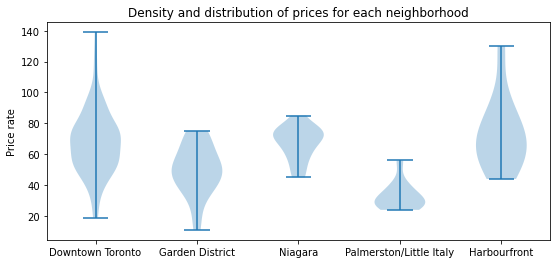

In [30]:
# Filtering data for just the 5 nieghborhoods

nbhood = ['Downtown Toronto', 'Garden District', 'Niagara', 'Palmerston/Little Italy', 'Harbourfront']

nb1 = listing.loc[listing['neighborhood'] == nbhood[0]]
nb2 = listing.loc[listing['neighborhood'] == nbhood[1]] 
nb3 = listing.loc[listing['neighborhood'] == nbhood[2]] 
nb4 = listing.loc[listing['neighborhood'] == nbhood[3]] 
nb5 = listing.loc[listing['neighborhood'] == nbhood[4]] 

data_to_plot = [nb1.price_rate, nb2.price_rate, nb3.price_rate, nb4.price_rate, nb5.price_rate]

# Creates a figure instance
fig1 = plt.figure(figsize=(9, 4))

# Create an axes instance
ax = fig1.subplots()
ax.set_title('Density and distribution of prices for each neighborhood')
ax.set_ylabel('Price rate')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(nbhood)

# Create the boxplot
ax.violinplot(dataset=data_to_plot)

From this plot I came out with this conclusions:
<ol>
<li>Downtown Toronto has the highest range of prices for the listings, its price density sits above the price average. It was expected for Downtown to be expensive.
<li>Niagara seems to have a tendency to have higher prices rather than low. Its average is close to that of DownTown toronto.
<li>Price rate distribution and density for Little Italy is low compared to other neighborhoods in our analysis. It is an affordable place to look for in airbnb. 
<li>Harbourfront lowest price rate is just below Downtown Toronto's average price rate. It is an expensive borough to live in. 
</ol>

**Space type**<br>
Majority of listings are described as condos, apartments and private rooms. 

In [88]:
listing.groupby(by='space_type')['price_rate']\
.describe()\
.sort_values(by='count', ascending=False)\
.head(5)

,count,mean,std,min,25%,50%,75%,max
space_type,,,,,,,,
Entire condominium,106.0,69.603774,16.309903,37.0,57.25,68.0,75.00,120.0
Entire apartment,82.0,56.975610,19.089766,11.0,44.00,53.0,70.50,130.0
Private room,46.0,33.304348,12.323184,14.0,25.00,32.0,41.75,66.0
Entire guest suite,16.0,51.687500,14.164363,19.0,43.25,54.0,57.75,75.0
Entire house,10.0,52.100000,22.338059,29.0,39.50,44.0,55.25,104.0


In [41]:
# Count of background colors
listing.image_dominantbgColor.value_counts()

White     123
Grey       82
Black      28
Brown      20
Blue       13
Green       3
Yellow      2
Name: image_dominantbgColor, dtype: int64

In [42]:
# Count of foreground colors
listing.image_dominantfgColor.value_counts()

White     125
Grey       82
Black      40
Brown      17
Orange      2
Yellow      2
Red         1
Green       1
Blue        1
Name: image_dominantfgColor, dtype: int64

In [31]:
# Grouping by fgcolor and bgcolor and counting number of unique groups.
listing.groupby(['image_dominantbgColor','image_dominantfgColor']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

,image_dominantbgColor,image_dominantfgColor,count
25,White,White,86
18,Grey,Grey,45
19,Grey,White,28
23,White,Grey,22
0,Black,Black,19
6,Blue,Grey,8
21,White,Black,8
9,Brown,Brown,7
12,Brown,White,6
15,Grey,Black,5


In [32]:
# Counting Sentiment values
reviews.Sentiment.value_counts()

Negative    824
Positve     499
Neutral      25
Name: Sentiment, dtype: int64

In [33]:
# Size for both dataFrames
print(f"Reviews: {len(reviews.index)}")
print(f"Listing: {len(listing.index)}")

Reviews: 1348
Listing: 271


Text(0.5, 1.0, 'Avg Polarity vs Foreground Color')

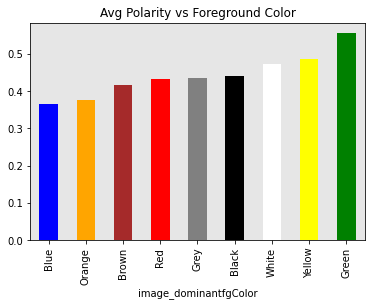

In [36]:
fgColor_Polarity = common.groupby(by='image_dominantfgColor')['Polarity'].mean().sort_values()
plot_fgColor_Polarity = fgColor_Polarity.plot(kind='bar', color=list(fgColor_Polarity.index.values))
plot_fgColor_Polarity.set_facecolor('0.90')
plot_fgColor_Polarity.set_title('Avg Polarity vs Foreground Color')
# reviews['Polarity'].loc[11533218].mean(axis=0)

Text(0.5, 1.0, 'Avg Polarity vs Background Color')

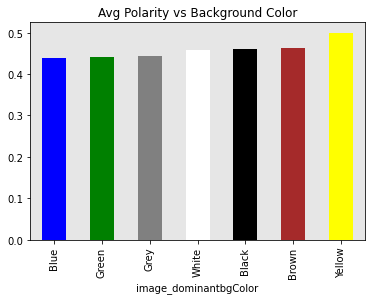

In [162]:
bgColor_Polarity = join_df.groupby(by='image_dominantbgColor')['Polarity'].mean().sort_values()
plot_bgColor_Polarity = bgColor_Polarity.plot(kind='bar', color=list(bgColor_Polarity.index.values))
plot_bgColor_Polarity.set_facecolor('0.90')
plot_bgColor_Polarity.set_title('Avg Polarity vs Background Color')

Text(0.5, 1.0, 'Avg Price vs Foreground Color')

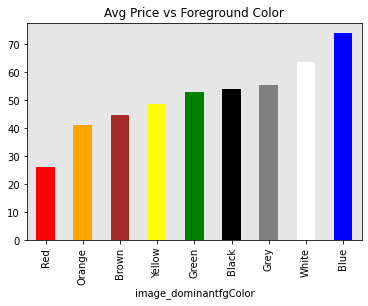

In [163]:
fgcolor_price = join_df.groupby(by='image_dominantfgColor')['price_rate'].mean().sort_values()
plot_fgcolor_price = fgcolor_price.plot(kind='bar', color=list(fgcolor_price.index.values))
plot_fgcolor_price.set_facecolor('0.90')
plot_fgcolor_price.set_title('Avg Price vs Foreground Color')

Text(0.5, 1.0, 'Avg Price vs Background Color')

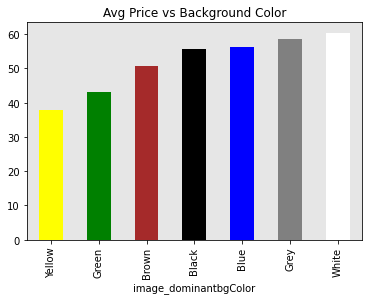

In [164]:
bgcolor_price = join_df.groupby(by='image_dominantbgColor')['price_rate'].mean().sort_values()
plot_bgcolor_price = bgcolor_price.plot(kind='bar', color=list(bgcolor_price.index.values))
plot_bgcolor_price.set_facecolor('0.90')
plot_bgcolor_price.set_title('Avg Price vs Background Color')

Text(0.5, 1.0, 'Polarity vs Background Color')

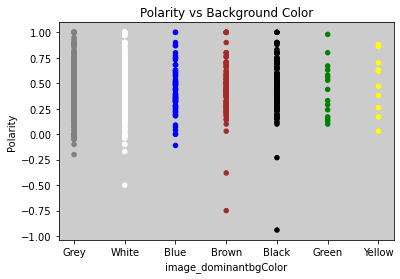

In [7]:
scatter_bgcolor_pol = join_df.reset_index().plot(kind='scatter', x='image_dominantbgColor', y='Polarity', c='image_dominantbgColor')
scatter_bgcolor_pol.set_facecolor('0.80')
scatter_bgcolor_pol.set_title('Polarity vs Background Color')

Text(0.5, 1.0, 'Polarity vs Foreground Color')

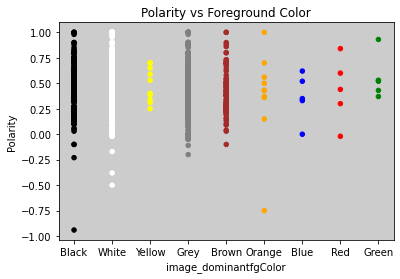

In [11]:
scatter_fgcolor_pol = join_df.reset_index().plot(kind='scatter', x='image_dominantfgColor', y='Polarity', c='image_dominantfgColor')
scatter_fgcolor_pol.set_facecolor('0.80')
scatter_fgcolor_pol.set_title('Polarity vs Foreground Color')

In [167]:
join_df.describe()

,lat,lng,person_capacity,price_rate,rating,Polarity
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,43.656215,-79.390411,3.135757,58.089021,4.712166,0.452901
std,0.021258,0.039300,1.473890,21.983515,0.662003,0.235778
min,43.596710,-79.536156,1.000000,11.000000,1.000000,-0.940000
25%,43.642490,-79.403710,2.000000,43.000000,5.000000,0.300000
50%,43.648440,-79.388740,3.000000,56.000000,5.000000,0.430000
75%,43.663213,-79.377455,4.000000,75.000000,5.000000,0.590000
max,43.738670,-79.229900,9.000000,139.000000,5.000000,1.000000


In [168]:
join_df.loc[join_df['Polarity'] < 0].sort_values(by='Polarity').head(10)

,city,neighborhood,name,lat,lng,person_capacity,space_type,picture_url,price_rate,image_description,image_dominantfgColor,image_dominantbgColor,author,rating,comments,Polarity,Sentiment,Keywords_reviews
id,,,,,,,,,,,,,,,,,,
30567717,Toronto,Harbourfront,Beautiful Bachelor Suite with Amazing View!,43.641210,-79.382260,2,Entire condominium,https://a0.muscache.com/im/pictures/f3c63bd7-c...,52,a tall building in a city,Black,Black,Harris,5,"You will not be disappointed, go ahead and book!",-0.94,Negative,book
12007026,Toronto,Downtown Toronto,3min Downtown YONGE/ BLOOR QUEENBED CLEAN,43.668500,-79.385960,2,Private room,https://a0.muscache.com/im/pictures/50f80400-b...,38,a kitchen with a wood floor,Orange,Brown,Isabela,2,Expect fucking frying smell at 10 in the eveni...,-0.75,Negative,"evening, fucking frying smell"
17682453,Toronto,Palmerston/Little Italy,Room Slick Monochome. - Little Italy,43.663190,-79.411240,2,Private room,https://a0.muscache.com/im/pictures/736569d6-e...,25,a bedroom with a bed and desk in a room,White,White,Juana,1,"absolutely gross room , there was mold in the ...",-0.50,Negative,"spiders, iam allergic, mold, mosquitoes, horri..."
27705416,Toronto,Downtown Toronto,LUXURY LIVING IN THE HEART OF DOWNTOWN TORONTO,43.639190,-79.399530,4,Entire apartment,https://a0.muscache.com/im/pictures/10dd5390-2...,44,a living room filled with furniture and a larg...,White,Brown,Tarik,1,The place Iâ€™ve very small and uncomfortable....,-0.38,Negative,"ve, place iâ, owner"
21984758,Toronto,Downtown Toronto,Centrally Located Condo With Beautiful Lake View,43.640010,-79.393490,6,Entire condominium,https://a0.muscache.com/im/pictures/44d9a22e-f...,53,a lit up city at night,Black,Black,Joe,3,It was no really good experience no internet s...,-0.23,Negative,"good experience, tv, internet service, canâ, t..."
15082256,Toronto,Downtown Toronto,LUXURY! Prime Location+CN Tower View! FREE PA...,43.642580,-79.381570,8,Entire condominium,https://a0.muscache.com/im/pictures/3785b73b-2...,89,a view of a city with tall buildings in the ba...,Grey,Grey,Cali,4,"Nice place, insane view!",-0.20,Negative,"nice place, insane view"
15903030,Toronto,Garden District,Cozy 2 Bedrooms Loft at Downtown Core,43.654530,-79.373520,8,Entire apartment,https://a0.muscache.com/im/pictures/8f8c742c-0...,71,a kitchen with a wood floor,White,White,Kiran,1,Everything about this location was a bit disap...,-0.17,Negative,"coffee machine, kitchen exhaust, old coffee gr..."
19202117,Toronto,Downtown Toronto,Sleek Penthouse Condo at Super Location Downtown!,43.649040,-79.387920,3,Entire apartment,https://a0.muscache.com/im/pictures/d02708d7-3...,69,a tall glass building in a city,Grey,Blue,Cory,5,Close to everything downtown. If you arrive l...,-0.11,Negative,"bedroom unit, block, hr food mart, priced stu..."
21579122,Toronto,Downtown Toronto,55th+ Floor Lake View Suite By Union Station,43.641788,-79.381874,3,Entire condominium,https://a0.muscache.com/im/pictures/59dd22d3-e...,51,a tall building in a city,Black,White,Jennifer,4,Overall a nice place to stay. The TV never wor...,-0.10,Negative,"cable, host, stay, local tv, stick, previous g..."


In [169]:
reviews.loc[reviews.index == 30567717]

,author,rating,comments,Polarity,Sentiment,Keywords_reviews
id,,,,,,
30567717,James,5,Beautiful view!,1.00,Positve,beautiful view
30567717,Shahed,5,"Mike's Place is at an excellent location, walk...",0.36,Negative,"late check-in, mike's place, mike's apartment,..."
30567717,Harris,5,"You will not be disappointed, go ahead and book!",-0.94,Negative,book
30567717,John,5,We had a great time. Traveled for the Bruins g...,0.32,Negative,"great time, great communication, cn tower, wat..."
30567717,Cameron,5,Great price for an amazing location and condo!...,0.35,Negative,"great attractions, amazing location, great pri..."


In [170]:
listing.loc[listing.index == 30567717]

,city,neighborhood,name,lat,lng,person_capacity,space_type,picture_url,price_rate,image_description,image_dominantfgColor,image_dominantbgColor
id,,,,,,,,,,,,
30567717,Toronto,Harbourfront,Beautiful Bachelor Suite with Amazing View!,43.64121,-79.38226,2,Entire condominium,https://a0.muscache.com/im/pictures/f3c63bd7-c...,52,a tall building in a city,Black,Black


Text(0.5, 1.0, 'Price Rate vs Background Color')

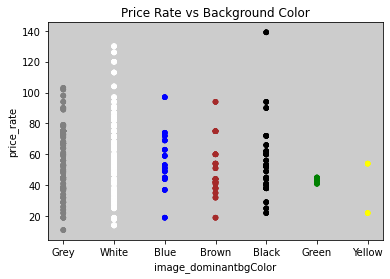

In [8]:
scatter_bgcolor_price = join_df.reset_index().plot(kind='scatter', x='image_dominantbgColor', y='price_rate', c='image_dominantbgColor')
scatter_bgcolor_price.set_facecolor('0.80')
scatter_bgcolor_price.set_title('Price Rate vs Background Color')

Text(0.5, 1.0, 'Price Rate vs Foreground Color')

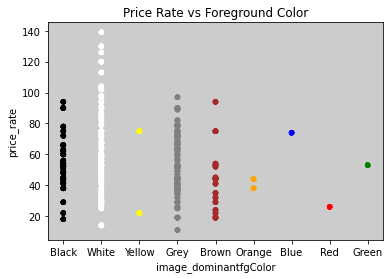

In [9]:
scatter_fgcolor_price = join_df.reset_index().plot(kind='scatter', x='image_dominantfgColor', y='price_rate', c='image_dominantfgColor')
scatter_fgcolor_price.set_facecolor('0.80')
scatter_fgcolor_price.set_title('Price Rate vs Foreground Color')